# Medicion paquete madera notebook

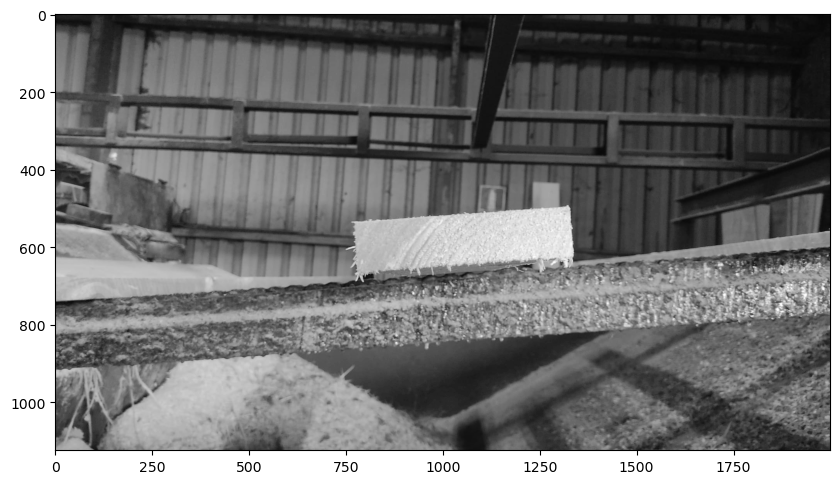

In [18]:
# binarizar imagen de escala de grises
#  hacer mascaras, normalmente parte blanca la que nos interesa

import cv2 as cv
import numpy as np

from matplotlib import pyplot as plt
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

img1 = cv.imread("tabla.JPG")
tablasGrises= cv.cvtColor(img1, cv.COLOR_BGR2GRAY)

plt.imshow(tablasGrises, cmap='gray')








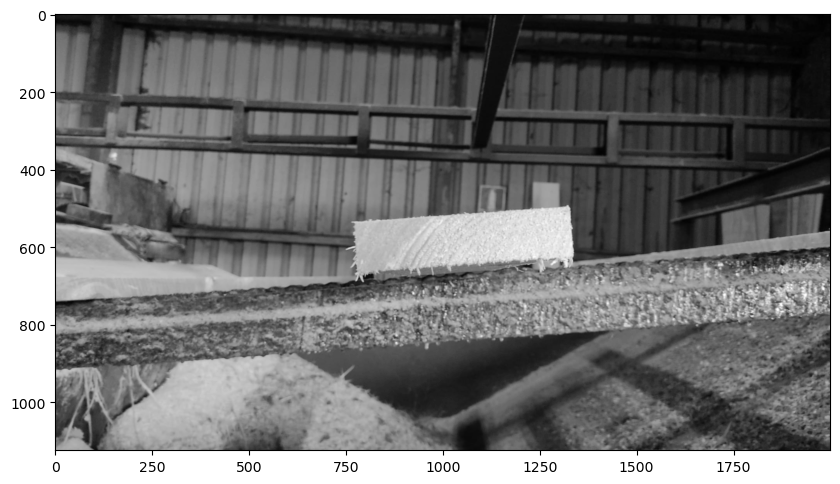

In [19]:
# difuninado gaussiano
#  para eliminar ruido


tablasGrises = cv.GaussianBlur(tablasGrises, (3,3), 0)


plt.imshow(tablasGrises, cmap='gray')

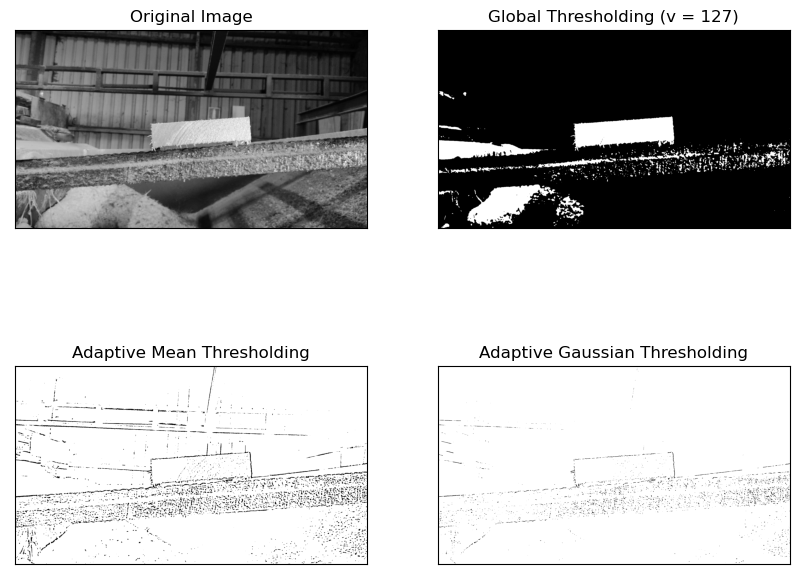

In [20]:



th1 = cv.threshold(tablasGrises,170,255,cv.THRESH_BINARY)[1]

th2 = cv.adaptiveThreshold(tablasGrises,223,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,13,17)
th3 = cv.adaptiveThreshold(tablasGrises,223,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,13,17)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [tablasGrises, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()



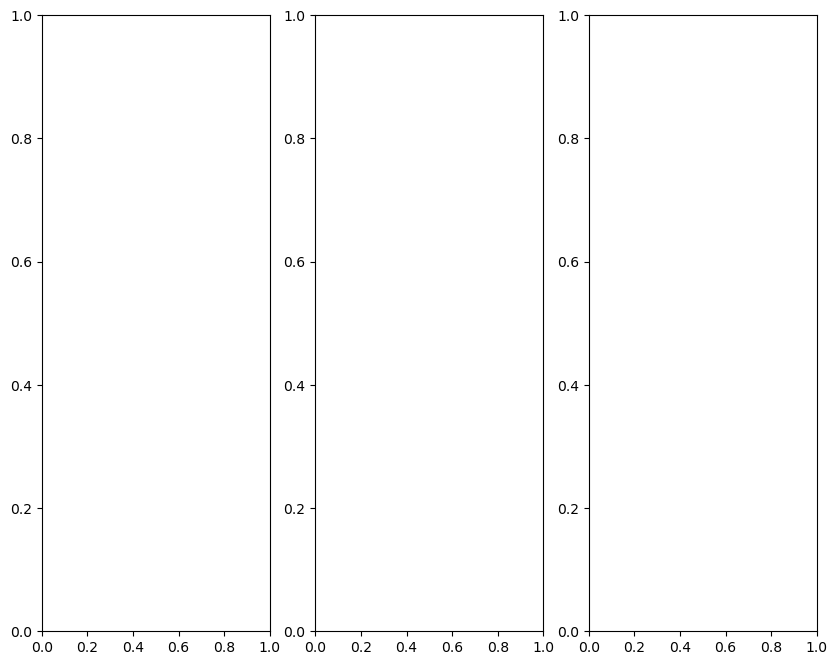

In [21]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3)
kernel = np.ones((3,3), np.uint8)
dilate = cv.dilate(th1, kernel, iterations=1)


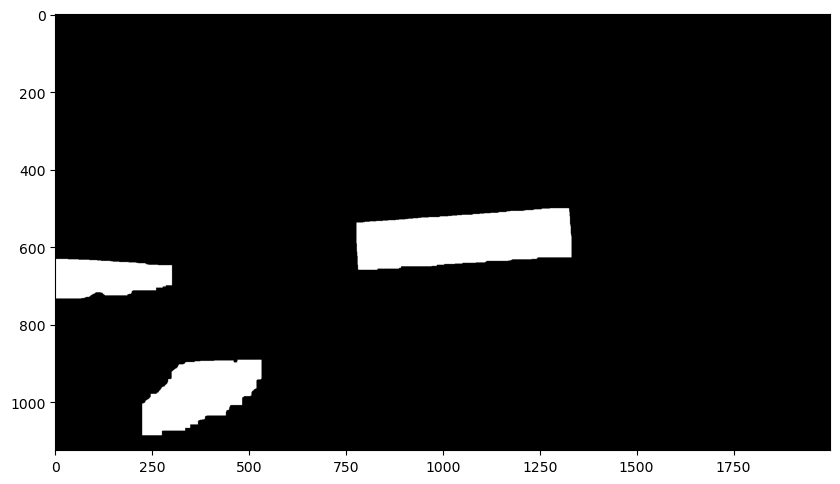

In [22]:

erode = cv.erode(dilate, kernel, iterations=1)
dilate = cv.erode(erode, kernel, iterations=1)
erode = cv.erode(dilate, kernel, iterations=1)
kernel = cv.getStructuringElement(cv.MORPH_RECT, (13,13))
opening = cv.morphologyEx(erode, cv.MORPH_OPEN, kernel, iterations=4)
# plt.imshow(cierre, cmap="gray")

# open = cv.morphologyEx(th3, cv.MORPH_CLOSE, kernel,iterations=2)

# dilatar lineas horizontales

# kernel = np.ones((2,1), np.uint8)
# open = cv.morphologyEx(open, cv.MORPH_CLOSE, kernel,iterations=1)

# dilatar lineas verticales



# kernel = np.ones((2,2), np.uint8)
# open = cv.dilate(cierre, kernel, iterations=2)



plt.imshow(opening, cmap="gray")




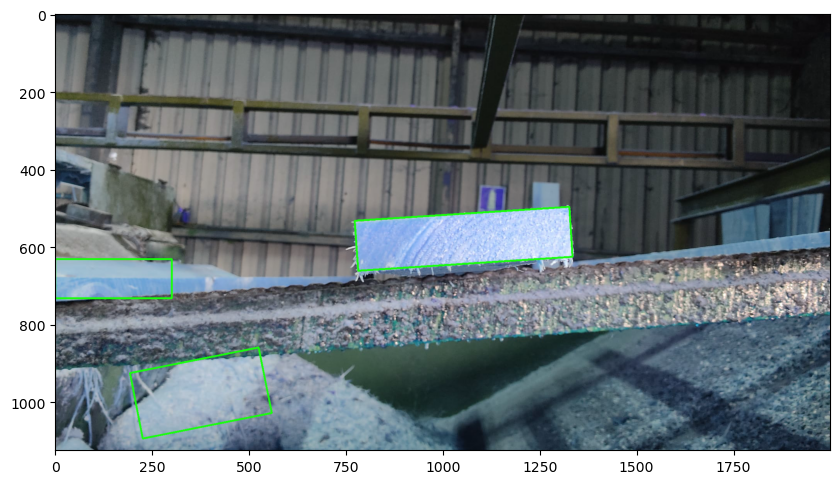

In [23]:
cnts = cv.findContours(opening, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
img4 = img1.copy()
for c in cnts:
    x,y,w,h = cv.boundingRect(c)
    rect = cv.minAreaRect(c)
    box = cv.boxPoints(rect)
    box = np.intp(box)
    cv.drawContours(img4,[box],0,(24,255,12),3)
    
plt.imshow(img4)

* x: La coordenada x del vértice superior izquierdo del rectángulo delimitador.
* y: La coordenada y del vértice superior izquierdo del rectángulo delimitador.
* w: El ancho del rectángulo delimitador.
* h: La altura del rectángulo delimitador.

38285.5
225 892 308 195
1.5794871794871794
24529.0
0 632 302 102
2.9607843137254903
68270.5
778 501 555 159
3.490566037735849


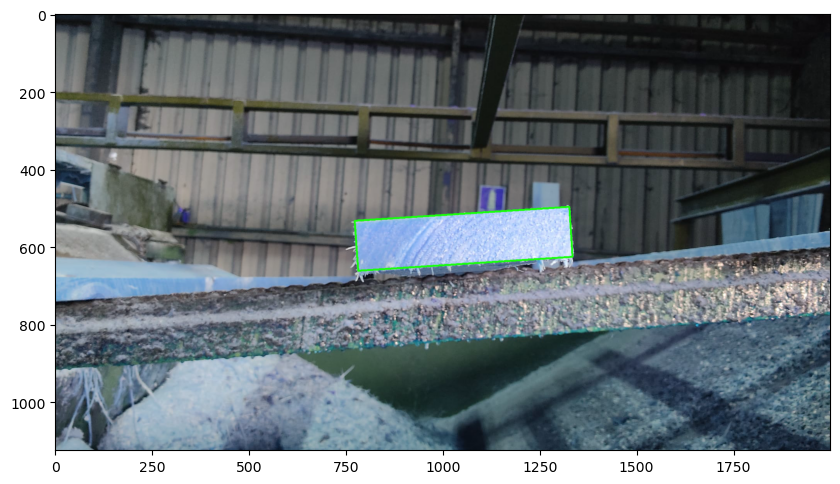

In [24]:
cnts = cv.findContours(opening, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
threshold = 50000
img5 = img1.copy()
for c in cnts:
    area = cv.contourArea(c)
    x,y,w,h = cv.boundingRect(c)
    aspect_ratio = float(w)/h
    print(area)
    print(x,y,w,h)
    print(aspect_ratio)
    if aspect_ratio > 3 and h>100 and h<200 and x>200:
        rect = cv.minAreaRect(c)
        box = cv.boxPoints(rect)
        box = np.intp(box)
        cv.drawContours(img5,[box],0,(24,255,12),3)


plt.imshow(img5)